# Модуль 2

## 2.1 Загрузка обработанных данных и разбитие на наборы

In [9]:
# Подключение библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# отключить предпреждения
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
train = pd.read_csv('train.csv')

In [14]:
# смотрим нет ли пропусков
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   253561 non-null  int64  
 1   session_id   253561 non-null  int64  
 2   site1        253561 non-null  int64  
 3   site2        253561 non-null  int64  
 4   site3        253561 non-null  int64  
 5   site4        253561 non-null  int64  
 6   site5        253561 non-null  int64  
 7   site6        253561 non-null  int64  
 8   site7        253561 non-null  int64  
 9   site8        253561 non-null  int64  
 10  site9        253561 non-null  int64  
 11  site10       253561 non-null  int64  
 12  start_hour   253561 non-null  int64  
 13  weekday      253561 non-null  int64  
 14  ГГГГММ       253561 non-null  int64  
 15  sesion_time  231052 non-null  float64
 16  target       253561 non-null  int64  
dtypes: float64(1), int64(16)
memory usage: 32.9 MB


In [15]:
train.isnull().sum()

Unnamed: 0         0
session_id         0
site1              0
site2              0
site3              0
site4              0
site5              0
site6              0
site7              0
site8              0
site9              0
site10             0
start_hour         0
weekday            0
ГГГГММ             0
sesion_time    22509
target             0
dtype: int64

In [16]:
# удалим все записи с отсутствующими значениями
train.dropna(inplace=True)

In [17]:
train.isnull().sum()

Unnamed: 0     0
session_id     0
site1          0
site2          0
site3          0
site4          0
site5          0
site6          0
site7          0
site8          0
site9          0
site10         0
start_hour     0
weekday        0
ГГГГММ         0
sesion_time    0
target         0
dtype: int64

In [20]:
# Разбили на челевую переменную и признаки
X = train.drop(columns=['target', 'Unnamed: 0'])

y = train['target']

In [21]:
#Разбитие на тренировочный и валидационный наборы
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, random_state=42, stratify=y)

## 2.2 Обучение и оценивание моделей

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve
def score_metric(presic, valid):
    fpr, tpr, thresholds = roc_curve(valid, presic)
    auc_score = roc_auc_score(valid, presic)
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

Модель KNeighborsClassifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

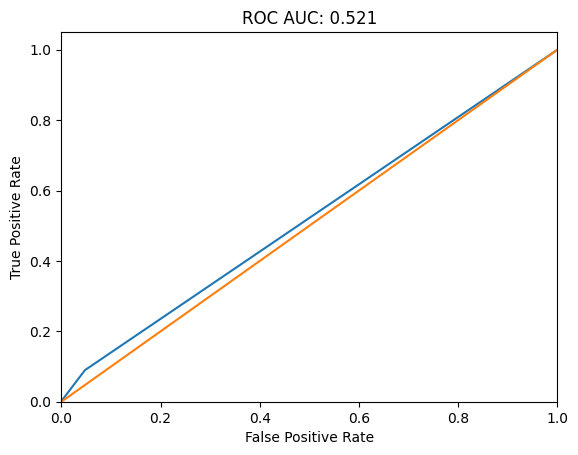

In [31]:
score_metric(knn_clf.predict_proba(X_valid)[:, 1], y_valid)

# Классификатор дерева

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

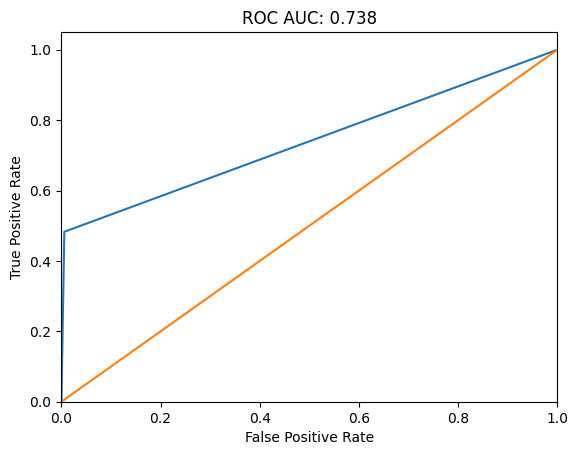

In [33]:
score_metric(tree_clf.predict_proba(X_valid)[:, 1], y_valid)

In [34]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)

RandomForestClassifier()

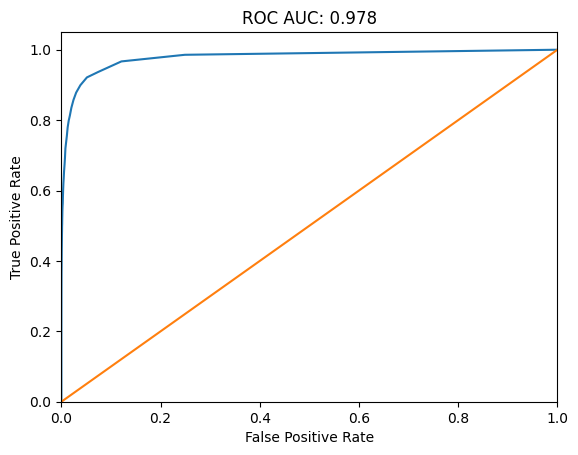

In [35]:
score_metric(rnd_clf.predict_proba(X_valid)[:, 1], y_valid)

Как мы видим RandomForestClassifier уже достаточ